In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#60000 mil imagenes de 28 x 28 pixeles
train_images.shape

(60000, 28, 28)

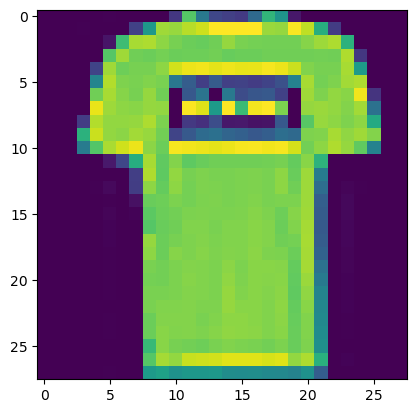

In [5]:
plt.imshow(train_images[1])

**Limpieza**

In [6]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

**Modelo de datos**


In [7]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

**Entrenamiento**

In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [9]:
epochs = [8, 16, 32, 48, 64, 80, 96, 112, 128]
accuracy = []
for i in range(len(epochs)):
    model.fit(train_images,
             train_labels,
             batch_size=64,
             epochs=epochs[i])
    accuracy.append(model.evaluate(test_images, test_labels)[1])

Epoch 1/8
938/938 [==============================] - 45s 47ms/step - loss: 0.5868 - accuracy: 0.7847
Epoch 2/8
938/938 [==============================] - 44s 46ms/step - loss: 0.4007 - accuracy: 0.8567
Epoch 3/8
938/938 [==============================] - 43s 46ms/step - loss: 0.3572 - accuracy: 0.8722
Epoch 4/8
938/938 [==============================] - 43s 46ms/step - loss: 0.3378 - accuracy: 0.8767
Epoch 5/8
938/938 [==============================] - 43s 46ms/step - loss: 0.3197 - accuracy: 0.8840
Epoch 6/8
938/938 [==============================] - 43s 46ms/step - loss: 0.3116 - accuracy: 0.8893
Epoch 7/8
938/938 [==============================] - 43s 46ms/step - loss: 0.3039 - accuracy: 0.8907
Epoch 8/8
313/313 [==============================] - 2s 7ms/step - loss: 0.2752 - accuracy: 0.9022
Epoch 1/16
938/938 [==============================] - 43s 46ms/step - loss: 0.2976 - accuracy: 0.8952
Epoch 2/16
938/938 [==============================] - 43s 45ms/step - loss: 0.2930 - accurac

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3129 - accuracy: 0.8906


[0.3129361569881439, 0.8906000256538391]

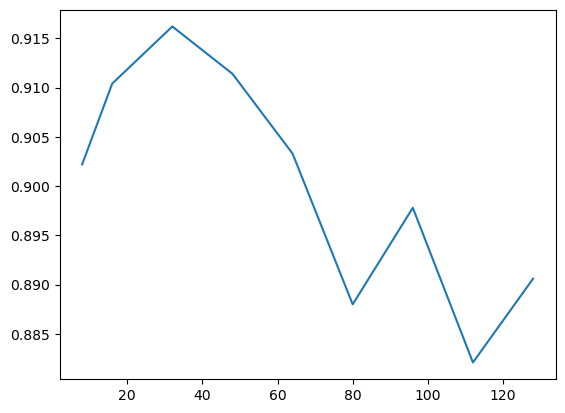

In [11]:
#Epochs vs accuracy

fig,ax = plt.subplots(1)
ax.plot(epochs, accuracy)
plt.show()